<a href="https://colab.research.google.com/github/enerhy/fmi-cv/blob/main/Introduction_ComputerVision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Image Analiysis with Neural Networks

This tutorial demonstrates several main concepts of using Neural Networks for Computer Vision. The framework used is Tensorflow/Keras. Topics included:
* Building and using an ANN for simple classification
* Building and using CNNs for classification
* Batch Processing and Data Augmentation with ImageDataGenerator
* Defining Residual Block and Inception block and using them in a custom CNN
* Use of Transfer Learning and predefined models such as ResNet50/ VGG16 with partially training part of the network 

*(Some of the explainations in this tutorial are taken from from VISUM 2021 and Coursera Course on CNN and AI by DeepLearning.AI)*

## Learn how to activate the access to GPUs!
In the menu options, go to "Runtime" and click on "Change runtime type". The following screen should appear:

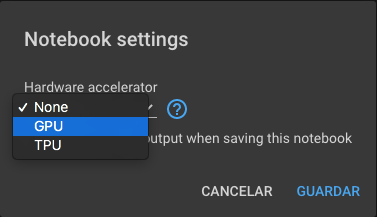

To activate the GPUs, just click on "GPU". If you are using Tensorflow & Keras you can try to use the "TPU", which is optimised for this framework.

## Check GPU Availability with Linux comands
Do you know that Google Colaboratory allows you to run Terminal commands? For instance, let's say that you want to check if you have GPU availability:

In [ ]:
# Check GPU availability with the following command
!nvidia-smi

Sun Nov 28 14:59:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Mathematical Concepts of Deep Learning

**Lousy definition:** Deep learning is the use of **many-layered models** optimized by **gradient descent** where gradients are computed by **backpropagation**.



#### Many Layered Model:
<center> $ \displaystyle \hat{y} = \sigma(V^T\sigma(W^Tx))$ </center>

#### Gradient Descent:
<center> $ \displaystyle W_{t+1} = W_{t} - \gamma \frac{\partial}{\partial W} C $ </center>

\\
<center> $ \displaystyle V_{t+1} = V_{t} - \gamma \frac{\partial}{\partial V} C $ </center>

#### Backpropagation:
<center> $ \displaystyle \frac{\partial}{\partial V} C = 
\frac{\partial \hat{y}}{\partial V}
\frac{\partial}{\partial \hat{y}} C $ </center>

\\
<center> $ \displaystyle \frac{\partial}{\partial W} C = 
\frac{\partial z_1}{\partial W}
\frac{\partial \hat{y}}{\partial z_1}
\frac{\partial}{\partial \hat{y}} C $ </center>

<center>

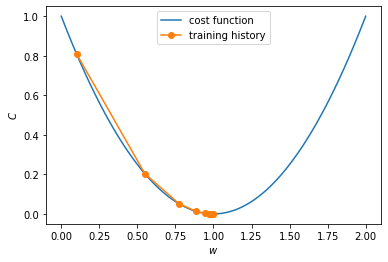
</center>

## Tensorflow & Keras
According to their official [website](https://www.tensorflow.org/about): "Whether you’re an expert or a beginner, TensorFlow is an end-to-end platform that makes it easy for you to build and deploy ML models."

It is currently maintained by Google and includes [Keras](https://keras.io), which is "an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear & actionable error messages. It also has extensive documentation and developer guides."

In [ ]:
# Imports 
import tensorflow as tf
from tensorflow import keras 
import numpy as np
from matplotlib import pyplot as plt

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.7.0


Some datasets are available directly as tf.keras datasets API

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Unpack the dataset into training and test data

In [ ]:
# Let's load data and split it into train and test; fortunately, Keras already did that for us
(X_train, y_train), (X_test, y_test) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

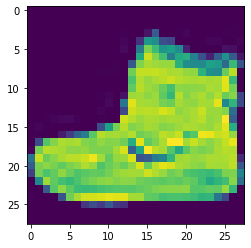

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
print(y_train[0])
print(X_train[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping.<br>

Lets normalize the data and get some more info:

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

print(f"Shape of X_train is {X_train.shape} and y_train is {y_train.shape}")
print(f"Maximum value of X_train is {X_train.max()} | Minimum value of X_train is {X_train.min()}")
print(f"Shape of X_test is {X_test.shape} and y_test is {y_test.shape}")
print(f"Maximum value of X_test is {X_test.max()} | Minimum value of X_test is {X_test.min()}")
print(f"Number of Labels: {len(np.unique(y_train))}")
print(f"Labels: {np.unique(y_train)}")

Shape of X_train is (60000, 28, 28) and y_train is (60000,)
Maximum value of X_train is 1.0 | Minimum value of X_train is 0.0
Shape of X_test is (10000, 28, 28) and y_test is (10000,)
Maximum value of X_test is 1.0 | Minimum value of X_test is 0.0
Number of Labels: 10
Labels: [0 1 2 3 4 5 6 7 8 9]


# Build and train an ANN

In [ ]:
# Let's use the Sequential API which allows us to connect the different layers in our model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(512, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(256, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Print the architecture

In [ ]:
# Let's "see" our model using the method "summary"
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [ ]:
# To train this model, we need to define some hyperparameters
# Let's start by the loss function (also known as criterion) 
from keras.losses import SparseCategoricalCrossentropy
criterion = SparseCategoricalCrossentropy(from_logits=False)

# Now, let's choose an optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

# We have to "add" this information to our model; to do that we use the "compile" method
model.compile(optimizer=optimizer, loss=criterion, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5483 - accuracy: 0.8080 - val_loss: 0.4318 - val_accuracy: 0.8406
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4088 - accuracy: 0.8524 - val_loss: 0.3774 - val_accuracy: 0.8640
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3745 - accuracy: 0.8637 - val_loss: 0.3632 - val_accuracy: 0.8711
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3532 - accuracy: 0.8702 - val_loss: 0.3505 - val_accuracy: 0.8759
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3366 - accuracy: 0.8760 - val_loss: 0.3400 - val_accuracy: 0.8796
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3255 - accuracy: 0.8797 - val_loss: 0.3295 - val_accuracy: 0.8830
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3130 - accuracy: 0.8857 - val_loss: 0.3323 - val_accuracy:

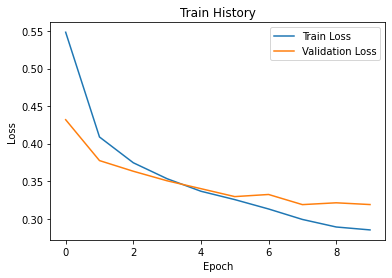

In [ ]:
# We can plot the model history
# Train and Validation Losses
plt.plot(history.epoch, history.history['loss'], label="Train Loss")
plt.plot(history.epoch, history.history['val_loss'], label="Validation Loss")
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Evaluate on the Test data

In [ ]:
# Get Loss and Evaluation Metric on the whole dataset:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3412 - accuracy: 0.8830


[0.34121155738830566, 0.8830000162124634]

In [ ]:
pred_first_image = model.predict(np.expand_dims(X_test[0], 0))
pred_first_image = np.argmax(pred_first_image)
print('Predicted label: ', pred_first_image)
print('True label: ', y_test[0])

Predicted label:  9
True label:  9


# Convolutional Neural Networks (CNNs) for Image Classification
"A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.", [*Towards Data Science*](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

[![CNNs](https://miro.medium.com/max/700/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

X_train 	Shape: (50000, 32, 32, 3) 	Minimum: 0.0 	Maximum: 1.0
X_test 	Shape: (10000, 32, 32, 3) 	Minimum: 0.0 	Maximum: 1.0
Number of class names is equal to the number of labels: True


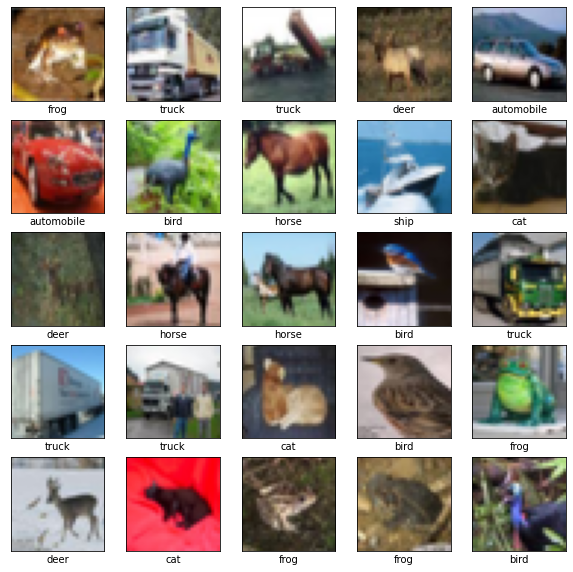

In [ ]:
# Let's implement a CNN in Tensorflow & Keras
# Import the necessary packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Let's also prepare our dataset
# For this part we will be using the CIFAR-10 dataset
from keras.datasets import cifar10

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

print(f"X_train \tShape: {X_train.shape} \tMinimum: {X_train.min()} \tMaximum: {X_train.max()}")
print(f"X_test \tShape: {X_test.shape} \tMinimum: {X_test.min()} \tMaximum: {X_train.max()}")


# Let's check that everything is OK
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Number of class names is equal to the number of labels: {len(class_names)==len(np.unique(y_train))}")


# We can plot some images to see how CIFAR-10 looks
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# Now, let's build a small CNN to classify these images
# This is another way of using the Sequential API to build Keras Models (there are more ways to do this!)
model = keras.models.Sequential()

# Convolutional Layers (Feature Extraction)
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

# Fully-Connected Layers (Classification)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

# Let's check the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

In [ ]:
# Now, let's add more parameters
# Loss functions
criterion = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Optimizer
adam = keras.optimizers.Adam(learning_rate=0.001)

# We now compile the model
model.compile(optimizer=adam, loss=criterion, metrics=['accuracy'])

# Let's create a checkpoint to save the best model based on validation loss
checkpoint = keras.callbacks.ModelCheckpoint("cifar10.hdf5", monitor='val_loss', verbose=2, save_best_only=True, save_weights_only=True)

* We use Categorical Corssentropy because it is a categorical classification provlem
* We use an optimization in the Gradient Descent algorithm called Adam with a learning rate of 0.001. Check this series for more information: [Improving Deep Neural Networks:](https://www.youtube.com/watch?v=1waHlpKiNyY&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc)

* Finally, we choose a metric to evaluate the performance of our model

In [ ]:
# Let's train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[checkpoint])

Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 1.6386 - accuracy: 0.3990
Epoch 00001: val_loss improved from inf to 1.43314, saving model to cifar10.hdf5
1094/1094 [==============================] - 17s 9ms/step - loss: 1.6386 - accuracy: 0.3990 - val_loss: 1.4331 - val_accuracy: 0.4897
Epoch 2/10
1092/1094 [============================>.] - ETA: 0s - loss: 1.2788 - accuracy: 0.5439
Epoch 00002: val_loss improved from 1.43314 to 1.22861, saving model to cifar10.hdf5
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2788 - accuracy: 0.5439 - val_loss: 1.2286 - val_accuracy: 0.5623
Epoch 3/10
1090/1094 [============================>.] - ETA: 0s - loss: 1.1231 - accuracy: 0.6023
Epoch 00003: val_loss improved from 1.22861 to 1.13062, saving model to cifar10.hdf5
1094/1094 [==============================] - 10s 9ms/step - loss: 1.1231 - accuracy: 0.6023 - val_loss: 1.1306 - val_accuracy: 0.6022
Epoch 4/10
1091/1094 [============================>.]

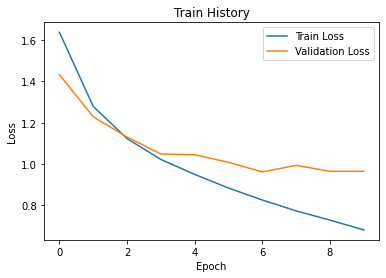

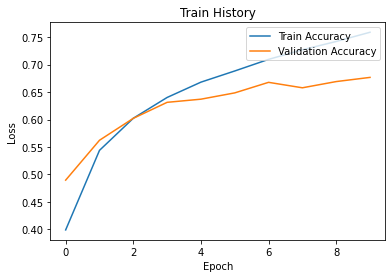

313/313 - 1s - loss: 0.9836 - accuracy: 0.6711 - 1s/epoch - 4ms/step


In [ ]:
# Let's plot the losses
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Let's plot the losses
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()



# And evaluate the model
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

* The training loss and accuraccy improve and would continue to improve according to the graphic.
* The validation loss and accuracy seem to have stoped improving
* The descrepancy in the performance on the Training and Validation data implies that our model is overfitting

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

--2021-11-28 16:21:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   197MB/s    in 0.3s    

2021-11-28 16:21:10 (197 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
index = 0

In [ ]:
# Get the number of files in each folder

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
# Get the files listed in order to look into them for visualization

fnames_train_dogs = os.listdir(train_dogs_dir)
fnames_train_cats = os.listdir(train_cats_dir)

print(fnames_train_dogs[:10])
print(fnames_train_cats[:10])

['dog.162.jpg', 'dog.621.jpg', 'dog.982.jpg', 'dog.531.jpg', 'dog.796.jpg', 'dog.860.jpg', 'dog.732.jpg', 'dog.313.jpg', 'dog.100.jpg', 'dog.381.jpg']
['cat.807.jpg', 'cat.977.jpg', 'cat.296.jpg', 'cat.564.jpg', 'cat.81.jpg', 'cat.333.jpg', 'cat.542.jpg', 'cat.782.jpg', 'cat.43.jpg', 'cat.82.jpg']


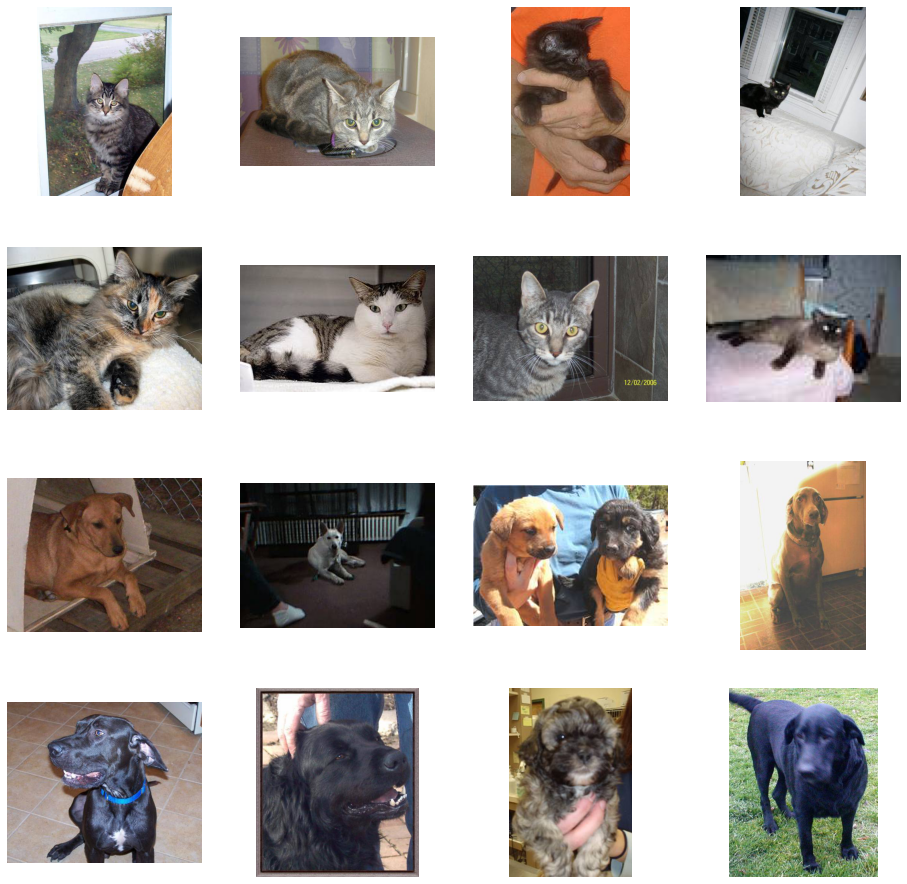

(500, 356, 3)
(332, 500, 3)
(299, 187, 3)
(499, 331, 3)
(337, 400, 3)
(196, 299, 3)
(375, 499, 3)
(72, 95, 3)
(397, 500, 3)
(239, 320, 3)
(187, 258, 3)
(500, 332, 3)
(414, 500, 3)
(500, 429, 3)
(399, 258, 3)
(500, 393, 3)


In [ ]:
# Get current figure and create 
fig = plt.gcf()
fig.set_size_inches(4*nrows, 4*ncols)

index +=8

to_display_cats = [os.path.join(train_cats_dir, fname) for fname in fnames_train_cats[index-8:index]
                   ]

to_display_dogs = [os.path.join(train_dogs_dir, fname) for fname in fnames_train_dogs[index-8:index]
                   ]

for i, img_path in enumerate(to_display_cats+to_display_dogs):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()         


for i, img_path in enumerate(to_display_cats+to_display_dogs):
  img_i = plt.imread(img_path)
  print(img_i.shape)

## Build a simple CNN

In [ ]:
# We usually have shrinking image and increasing depth

model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # Note: when padding=valid the image is padded at in the first Conv2D layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 128)     

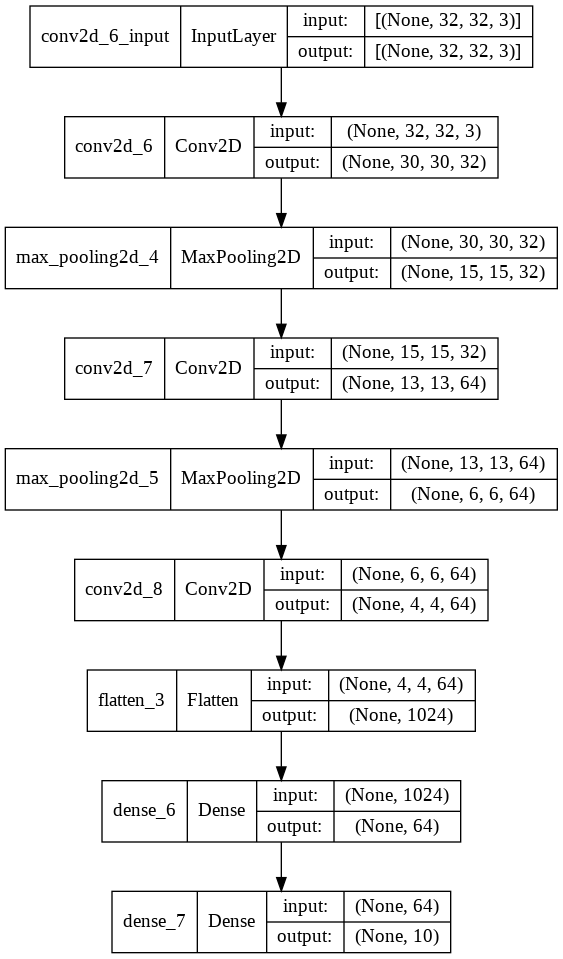

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam, RMSprop
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# The cross entropy is our Loss function to optimize
# It is the oposite of the Log-likeliyhood
# So we eighter minimize crossentropy or optimize log-likeliyhood

## Data Preprocessing in Batches

* With batch processing we can define minibatch size and drain our model with Mini Batch Gradient Descent.
* We can use ImageDataGenerator from Tensorflow to preprocess the data too.
* With ImageDataGenerator from Tensorflow we can run a realtime data augmentation without saving all augmented data into memory!


Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  valid_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Run Training
history = model2.fit(train_generator, 
                              steps_per_epoch=100, # 2000 images = batch_size * steps
                              epochs=10, 
                              verbose=2, 
                              validation_data=validation_generator,
                              validation_steps=50,)
                              # callbacks=[callbacks]) # 1000 images = batch_size * steps

Epoch 1/10
100/100 - 12s - loss: 0.6934 - accuracy: 0.5165 - val_loss: 0.6842 - val_accuracy: 0.5450 - 12s/epoch - 118ms/step
Epoch 2/10
100/100 - 11s - loss: 0.6644 - accuracy: 0.5755 - val_loss: 0.6401 - val_accuracy: 0.6640 - 11s/epoch - 107ms/step
Epoch 3/10
100/100 - 11s - loss: 0.6137 - accuracy: 0.6690 - val_loss: 0.6187 - val_accuracy: 0.6760 - 11s/epoch - 106ms/step
Epoch 4/10
100/100 - 11s - loss: 0.5488 - accuracy: 0.7275 - val_loss: 0.5618 - val_accuracy: 0.7080 - 11s/epoch - 106ms/step
Epoch 5/10
100/100 - 11s - loss: 0.5102 - accuracy: 0.7585 - val_loss: 0.5745 - val_accuracy: 0.7010 - 11s/epoch - 105ms/step
Epoch 6/10
100/100 - 11s - loss: 0.4649 - accuracy: 0.7815 - val_loss: 0.5361 - val_accuracy: 0.7310 - 11s/epoch - 105ms/step
Epoch 7/10
100/100 - 11s - loss: 0.4391 - accuracy: 0.8065 - val_loss: 0.5386 - val_accuracy: 0.7340 - 11s/epoch - 106ms/step
Epoch 8/10
100/100 - 11s - loss: 0.3973 - accuracy: 0.8190 - val_loss: 0.5371 - val_accuracy: 0.7430 - 11s/epoch - 105

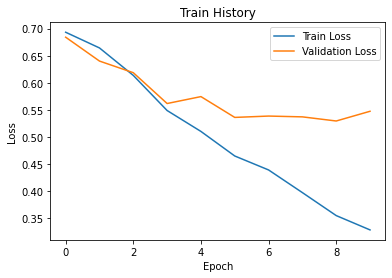

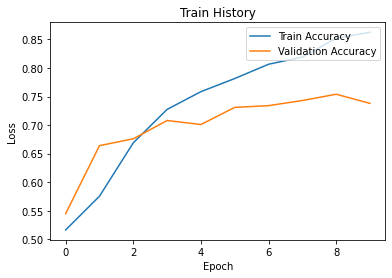

313/313 - 1s - loss: 0.9836 - accuracy: 0.6711 - 1s/epoch - 4ms/step


In [ ]:
# Let's plot the losses
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Let's plot the losses
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


The Training Accuracy will eventually get close to 100%, and the validation accuracy will be in the range 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code where we've added Image Augmentation. Run it to see the impact.


# Data Augmentation

* Preprocessing: Instantiate DataGenerator and run flow from directory
* Instantiatiate a Model (e.g. Class Sequential)
* Compile the model (optimizer, learning rate, etc)

In [ ]:
# Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# At least some kind of normlization to add (rescale =...)
# also some augumentation

train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

# The validation or test datagenerators do not need augumentation
valid_datagen = ImageDataGenerator(rescale=1.0/255.)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), # for target size, we dont include channels number
                                                    class_mode='binary',
                                                    # Since we use binary_crossentropy loss, we need binary labels
                                                    batch_size=20) # with batch size of 20 and 2000 images we 
                                                    # need 100 step per epoch to go through all images

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150, 150), # for target size, we dont include channels number
                                                    class_mode='binary',
                                                    batch_size=20)
                                                    # need 50 step per epoch to go through all images

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model3 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    # Note: when padding=valid the image is padded at in the first Conv2D layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam, RMSprop
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# The cross entropy is our Loss function to optimize
# It is the oposite of the Log-likeliyhood
# So we eighter minimize crossentropy or optimize log-likeliyhood

In [ ]:
# Run Training
history = model3.fit(train_generator, 
                              steps_per_epoch=100, # 2000 images = batch_size * steps
                              epochs=10, 
                              verbose=2, 
                              validation_data=validation_generator,
                              validation_steps=50,)
                              # callbacks=[callbacks]) # 1000 images = batch_size * steps

Epoch 1/10
100/100 - 27s - loss: 0.6938 - accuracy: 0.5185 - val_loss: 0.6924 - val_accuracy: 0.5000 - 27s/epoch - 267ms/step
Epoch 2/10
100/100 - 26s - loss: 0.6911 - accuracy: 0.5310 - val_loss: 0.6829 - val_accuracy: 0.6130 - 26s/epoch - 257ms/step
Epoch 3/10
100/100 - 26s - loss: 0.6788 - accuracy: 0.5675 - val_loss: 0.6733 - val_accuracy: 0.5970 - 26s/epoch - 257ms/step
Epoch 4/10
100/100 - 26s - loss: 0.6648 - accuracy: 0.6070 - val_loss: 0.6573 - val_accuracy: 0.6020 - 26s/epoch - 256ms/step
Epoch 5/10
100/100 - 26s - loss: 0.6400 - accuracy: 0.6245 - val_loss: 0.6363 - val_accuracy: 0.6240 - 26s/epoch - 257ms/step
Epoch 6/10
100/100 - 26s - loss: 0.6249 - accuracy: 0.6545 - val_loss: 0.6124 - val_accuracy: 0.6640 - 26s/epoch - 258ms/step
Epoch 7/10
100/100 - 26s - loss: 0.6087 - accuracy: 0.6660 - val_loss: 0.5847 - val_accuracy: 0.6680 - 26s/epoch - 258ms/step
Epoch 8/10
100/100 - 26s - loss: 0.5950 - accuracy: 0.6800 - val_loss: 0.6055 - val_accuracy: 0.6850 - 26s/epoch - 257

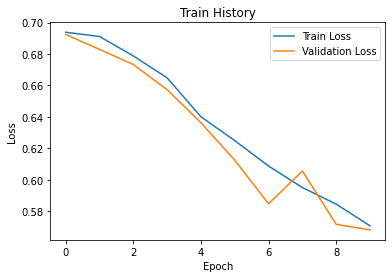

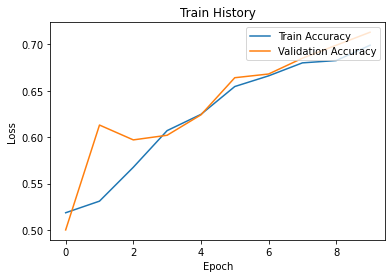

In [ ]:
# Let's plot the losses
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Let's plot the losses
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Use of Modern Building Blocks

Instead of using the Sequential API. We can use the functional way of building a Neural Network

In [ ]:
from tensorflow.keras.layers import Input, Add, Activation, Conv2D, ZeroPadding2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization, concatenate
from tensorflow.keras.models import Model

In [ ]:
IMAGE_SIZE = [150, 150]

In [ ]:
# INCEPTION BLOCK
def inception_block(X):
  # 3x3 Filter no pooling
  X_3x3 = Conv2D(8, kernel_size=(1,1))(X)
  X_3x3 = BatchNormalization()(X_3x3)
  X_3x3 = Activation('relu')(X_3x3)
  X_3x3 = ZeroPadding2D(padding=(1, 1))(X_3x3)
  X_3x3 = Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='valid')(X_3x3)
  X_3x3 = BatchNormalization()(X_3x3)
  X_3x3 = Activation('relu')(X_3x3)

  # 5x5 Filter no pooling
  X_5x5 = Conv2D(16, kernel_size=(1,1))(X)
  X_5x5 = BatchNormalization()(X_5x5)
  X_5x5 = Activation('relu')(X_5x5)
  X_5x5 = ZeroPadding2D(padding=(2, 2))(X_5x5)
  X_5x5 = Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='valid')(X_5x5)
  X_5x5 = BatchNormalization()(X_5x5)
  X_5x5 = Activation('relu')(X_5x5)

  # 1x1 Filter no pooling
  X_1x1 = Conv2D(32, kernel_size=(1,1))(X)
  X_1x1 = BatchNormalization()(X_1x1)
  X_1x1 = Activation('relu')(X_1x1)

  # Additional 1x1 with pooling
  X_pool = MaxPooling2D(pool_size=3, strides=1) (X)
  X_pool = Conv2D(32, kernel_size=(1, 1))(X_pool)
  X_pool = BatchNormalization()(X_pool)
  X_pool = Activation('relu')(X_pool)
  X_pool = ZeroPadding2D(padding=(1)) (X_pool)

  X = inception = concatenate([X_3x3, X_5x5, X_1x1, X_pool], axis=3)
  X = MaxPooling2D(pool_size=2)(X)

  return X

In [ ]:
# Resnet Block
def resnet_block(X, num_initial_kernels):  
  X_shortcut = X

  #Main Path
  X = Conv2D(num_initial_kernels, kernel_size=(1, 1), strides=(1, 1))(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X)

  X = Conv2D(num_initial_kernels*2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X)

  X = Conv2D(num_initial_kernels*2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
  X = BatchNormalization()(X)

  #Shortcut Path
  X_shortcut = Conv2D(num_initial_kernels*2, kernel_size=(1,1))(X_shortcut)
  X_shortcut = BatchNormalization()(X_shortcut)

  #Add the path together
  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)

  return X

In [ ]:
# Main Part
i = Input(shape=IMAGE_SIZE + [3])
X = Conv2D(16, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same') (i)
X = MaxPooling2D()(X)
X = BatchNormalization() (X)
X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same') (X)
X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same') (X)
X = Dropout(0.1)(X)
X = MaxPooling2D()(X)
X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same') (X)
X = Dropout(0.1)(X)

X = inception_block(X)
X = resnet_block(X, num_initial_kernels=64)

X = Flatten() (X)
X = Dense(512, activation ='relu')(X)
X = Dropout(0.1)(X)
X = Dense(1, activation='sigmoid') (X)

model4 = Model(i, X)
model4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_97 (Conv2D)             (None, 150, 150, 16  448         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_42 (MaxPooling2D  (None, 75, 75, 16)  0           ['conv2d_97[0][0]']              
 )                                                                                          

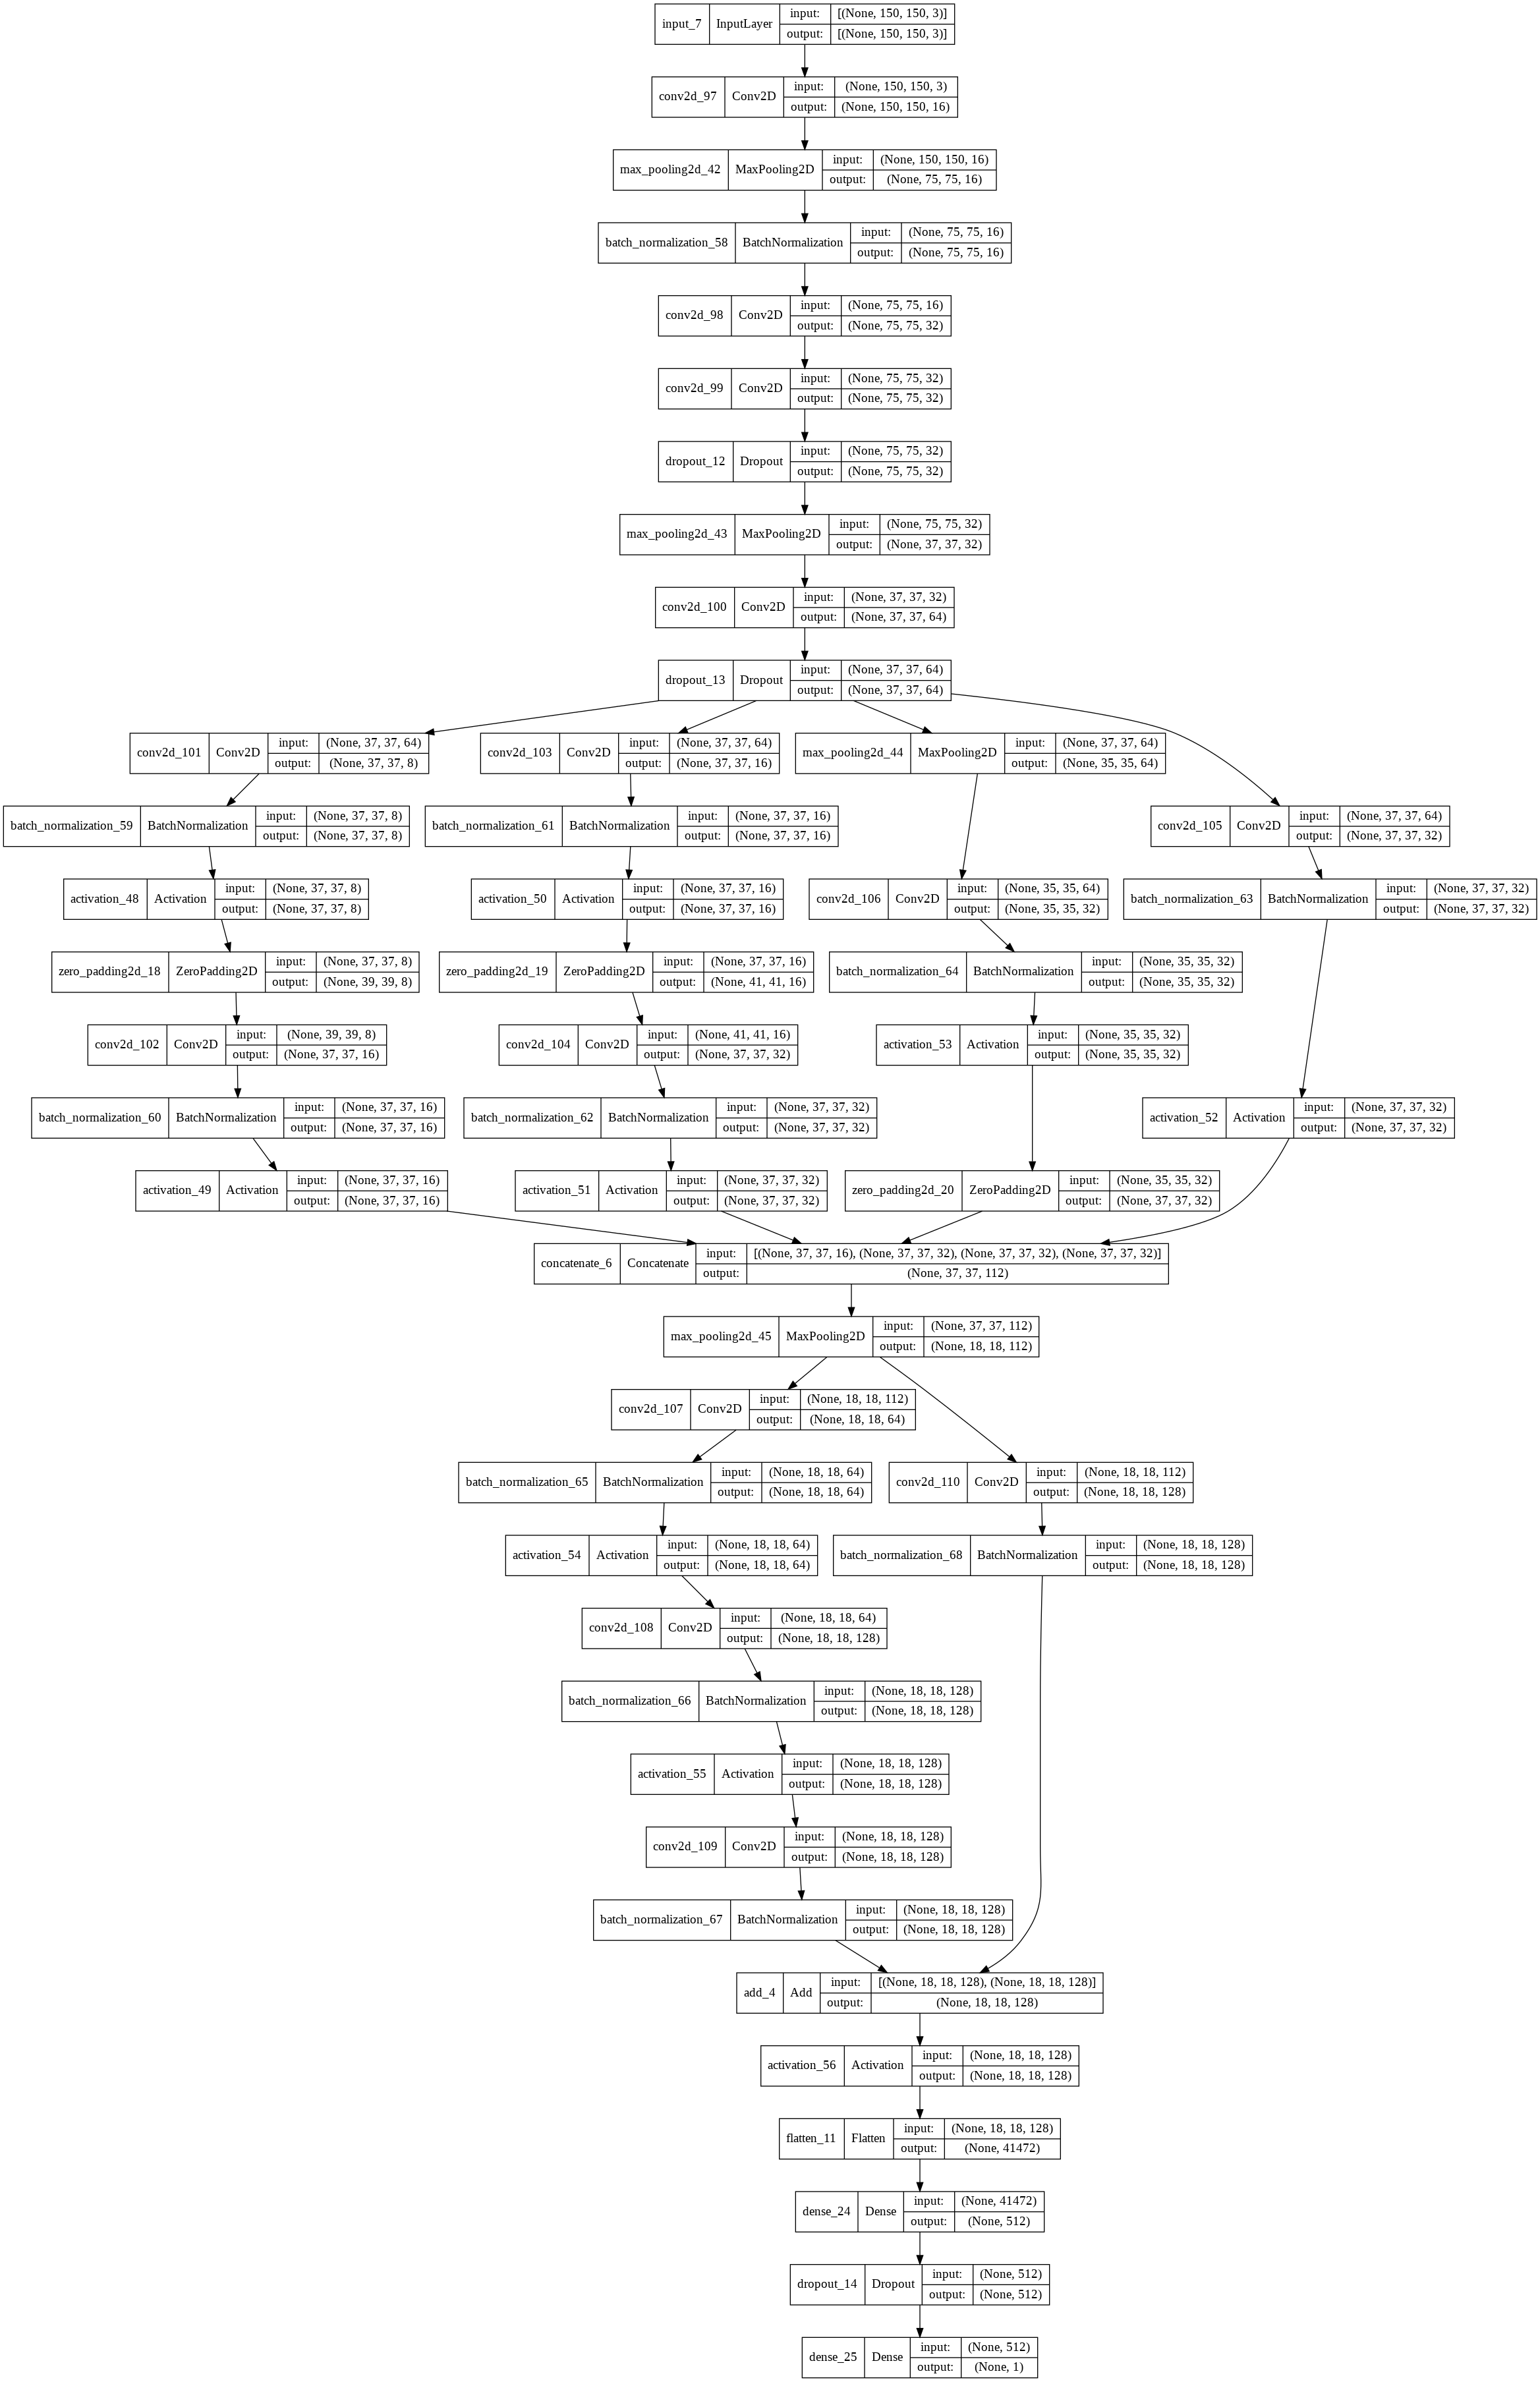

In [ ]:
tf.keras.utils.plot_model(model4, show_shapes=True)

In [ ]:
# Compile the model
from tensorflow.keras.optimizers import Adam, RMSprop
model4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# The cross entropy is our Loss function to optimize
# It is the oposite of the Log-likeliyhood
# So we eighter minimize crossentropy or optimize log-likeliyhood

In [ ]:
# Run Training
history = model4.fit(train_generator, 
                              steps_per_epoch=100, # 2000 images = batch_size * steps
                              epochs=10, 
                              verbose=2, 
                              validation_data=validation_generator,
                              validation_steps=50,)
                              # callbacks=[callbacks]) # 1000 images = batch_size * steps

Epoch 1/10
100/100 - 30s - loss: 3.5777 - accuracy: 0.5245 - val_loss: 0.6928 - val_accuracy: 0.5150 - 30s/epoch - 300ms/step
Epoch 2/10
100/100 - 27s - loss: 0.6764 - accuracy: 0.5665 - val_loss: 0.6976 - val_accuracy: 0.5150 - 27s/epoch - 270ms/step
Epoch 3/10
100/100 - 27s - loss: 0.6523 - accuracy: 0.6060 - val_loss: 0.6874 - val_accuracy: 0.5240 - 27s/epoch - 267ms/step
Epoch 4/10
100/100 - 27s - loss: 0.6450 - accuracy: 0.6100 - val_loss: 0.6831 - val_accuracy: 0.5180 - 27s/epoch - 268ms/step
Epoch 5/10
100/100 - 27s - loss: 0.6438 - accuracy: 0.6300 - val_loss: 0.6477 - val_accuracy: 0.6030 - 27s/epoch - 268ms/step
Epoch 6/10
100/100 - 27s - loss: 0.6405 - accuracy: 0.6205 - val_loss: 0.6306 - val_accuracy: 0.6550 - 27s/epoch - 267ms/step
Epoch 7/10
100/100 - 27s - loss: 0.6012 - accuracy: 0.6790 - val_loss: 0.6161 - val_accuracy: 0.6630 - 27s/epoch - 268ms/step
Epoch 8/10
100/100 - 27s - loss: 0.6036 - accuracy: 0.6735 - val_loss: 0.6052 - val_accuracy: 0.6410 - 27s/epoch - 268

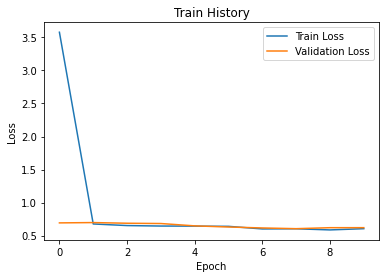

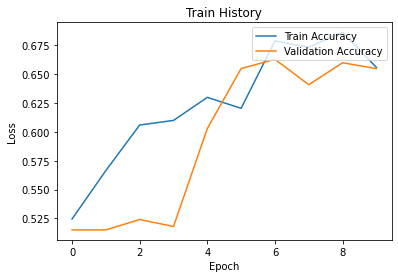

In [ ]:
# Let's plot the losses
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Let's plot the losses
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Pretrained Model and Transfer Learning

* We can use implemented CNN architecture such as VGG16/VGG19, ResNet50, Inception and others
* Furthermore we can reuse weights already trained on some datasets. In Tensorflow for example we can use these architectures with weights trained already on datasets such as ImageNet
* We can cut the head and trained only the weights of the last few Dense Layers
* Or we can even further train some of the late CNN blocks

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50 as ResNet50, preprocess_input
IMAGE_SIZE = [150, 150, 3]

resnet = ResNet50(
    input_shape=IMAGE_SIZE,
    weights='imagenet',
    include_top=False
)

resnet.summary()

In [ ]:
resnet.trainable = False

x = Flatten()(resnet.output)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model_resnet = Model(inputs = resnet.input, outputs=x)

# Compile the model
from tensorflow.keras.optimizers import Adam, RMSprop
model_resnet.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Run Training
history = model_resnet.fit(train_generator, 
                              steps_per_epoch=100, # 2000 images = batch_size * steps
                              epochs=10, 
                              verbose=2, 
                              validation_data=validation_generator,
                              validation_steps=50,)
                              # callbacks=[callbacks]) # 1000 images = batch_size * steps

Epoch 1/10
100/100 - 35s - loss: 0.7504 - accuracy: 0.5865 - val_loss: 0.7871 - val_accuracy: 0.5130 - 35s/epoch - 348ms/step
Epoch 2/10
100/100 - 29s - loss: 0.6856 - accuracy: 0.6025 - val_loss: 0.6504 - val_accuracy: 0.6250 - 29s/epoch - 292ms/step
Epoch 3/10
100/100 - 29s - loss: 0.6602 - accuracy: 0.6315 - val_loss: 0.6429 - val_accuracy: 0.6380 - 29s/epoch - 294ms/step
Epoch 4/10
100/100 - 30s - loss: 0.6462 - accuracy: 0.6270 - val_loss: 0.6246 - val_accuracy: 0.6440 - 30s/epoch - 296ms/step
Epoch 5/10
100/100 - 29s - loss: 0.6448 - accuracy: 0.6460 - val_loss: 0.6499 - val_accuracy: 0.6020 - 29s/epoch - 292ms/step
Epoch 6/10
100/100 - 29s - loss: 0.6527 - accuracy: 0.6335 - val_loss: 0.6239 - val_accuracy: 0.6550 - 29s/epoch - 289ms/step
Epoch 7/10
100/100 - 29s - loss: 0.6261 - accuracy: 0.6500 - val_loss: 0.6274 - val_accuracy: 0.6700 - 29s/epoch - 294ms/step
Epoch 8/10
100/100 - 29s - loss: 0.6258 - accuracy: 0.6435 - val_loss: 0.6656 - val_accuracy: 0.6250 - 29s/epoch - 294

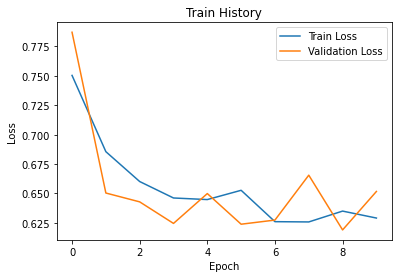

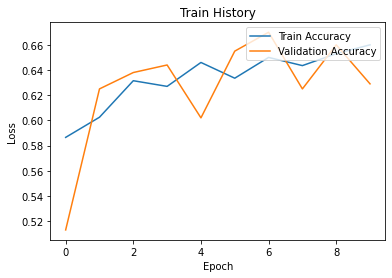

In [ ]:
# Let's plot the losses
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Let's plot the losses
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Train History")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Train (further) CNN blocks 

* we ahve to unfreeze the weights first - make them trainable
* freeze again until the layer from which we are starting the training

In [ ]:
# unfreeze pretrained model weights
resnet.trainable = True

# Define first from where the training to start
first_trainable_layer_name = 'conv4_block1_1_conv'

# Freeze all previous layers
for layer in resnet.layers:
  if layer.name == first_trainable_layer_name:
    break

  layer.trainable = False

# Check for if successful       
print('First trainable layer is :', layer.name)

In [ ]:
resnet.trainable = False

x = Flatten()(resnet.output)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model_resnet_2 = Model(inputs = resnet.input, outputs=x)

# Compile the model
from tensorflow.keras.optimizers import Adam, RMSprop
model_resnet_2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Run Training
history = model_resnet_2.fit(train_generator, 
                              steps_per_epoch=100, # 2000 images = batch_size * steps
                              epochs=10, 
                              verbose=2, 
                              validation_data=validation_generator,
                              validation_steps=50,)
                              # callbacks=[callbacks]) # 1000 images = batch_size * steps

Epoch 1/10
100/100 - 34s - loss: 0.8257 - accuracy: 0.5820 - val_loss: 0.7075 - val_accuracy: 0.5020 - 34s/epoch - 343ms/step
Epoch 2/10
100/100 - 29s - loss: 0.6718 - accuracy: 0.5950 - val_loss: 0.6548 - val_accuracy: 0.6200 - 29s/epoch - 291ms/step
Epoch 3/10
100/100 - 29s - loss: 0.6473 - accuracy: 0.6375 - val_loss: 0.6407 - val_accuracy: 0.6320 - 29s/epoch - 293ms/step
Epoch 4/10
100/100 - 29s - loss: 0.6473 - accuracy: 0.6390 - val_loss: 0.6521 - val_accuracy: 0.6180 - 29s/epoch - 293ms/step
Epoch 5/10
100/100 - 29s - loss: 0.6446 - accuracy: 0.6330 - val_loss: 0.6261 - val_accuracy: 0.6630 - 29s/epoch - 293ms/step
Epoch 6/10
100/100 - 29s - loss: 0.6361 - accuracy: 0.6440 - val_loss: 0.6644 - val_accuracy: 0.6790 - 29s/epoch - 293ms/step
Epoch 7/10
100/100 - 30s - loss: 0.6343 - accuracy: 0.6365 - val_loss: 0.7133 - val_accuracy: 0.6400 - 30s/epoch - 296ms/step
Epoch 8/10
100/100 - 29s - loss: 0.6344 - accuracy: 0.6455 - val_loss: 0.6315 - val_accuracy: 0.6680 - 29s/epoch - 295